# Estimate MP parameters for Vivek data

In [1]:
%load_ext autoreload
%autoreload
%matplotlib inline

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from skimage.util import img_as_float
from scipy.io import savemat

from otimage import io 
from otimage.utils import plot_maxproj
from otimage.imagerep import mp_gaussian, reconstruct_mp_image

### Load single frame to test on

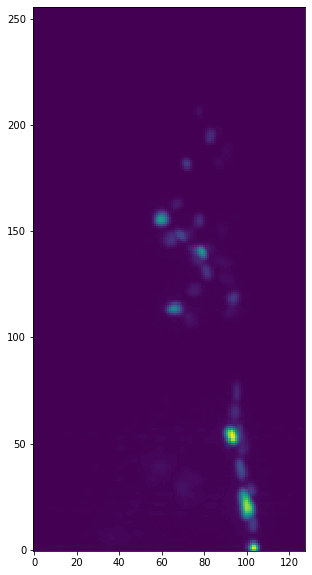

In [3]:
in_fpath = '/home/mn2822/Desktop/WormTraces/data/Vivek/1011_tail_03/data.mat'
t_frame = 3

with io.VivekReader(in_fpath) as reader:
    units = reader.units
    img = reader.get_frame(t_frame)

plt.figure(figsize=(10, 10))
plot_maxproj(img);

### Set parameters

The size of a *C. elegans* neuron is 2-3 microns (http://www.wormbook.org/chapters/www_intromethodsneurophys/intromethodsneurophys.html). Ideally, the MP component covariance should be set to cover a single cell.

In [13]:
# Covariance values for each dimension
cov = np.diag([0.5, 0.5, 0.5])

# Number of MP iterations to run
n_iter = 10

### Run MP on image and plot results

In [14]:
mp, debug = mp_gaussian(img, units, cov, n_iter)

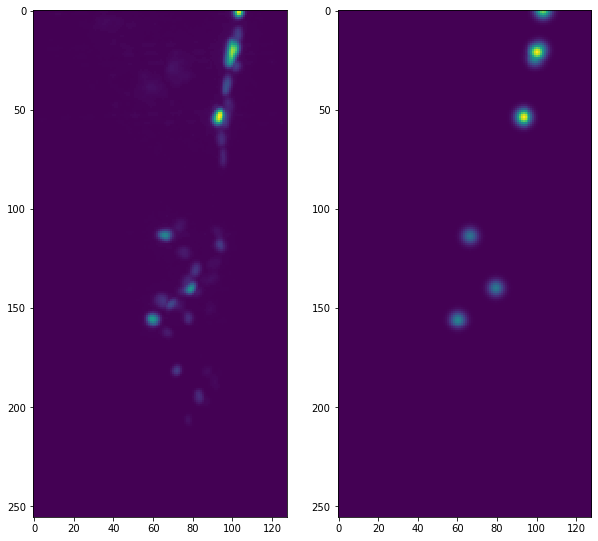

In [15]:
img_recon = reconstruct_mp_image(mp, units)

plt.figure(figsize=(10, 10))
    
plt.subplot(121)
plt.imshow(np.max(img, 2).T)
    
plt.subplot(122)
plt.imshow(np.max(img_recon, 2).T);